In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

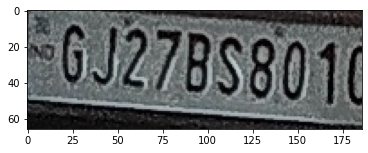

In [2]:
img = cv.imread("D:\DS\Image Smoothening\Data\Img1 (1).jpeg")
plt.imshow(img)

### 2D Convolution

<function matplotlib.pyplot.show(close=None, block=None)>

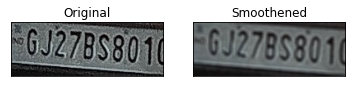

In [3]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img, -1, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.show
plt.subplot(122),plt.imshow(dst),plt.title('Smoothened')
plt.xticks([]),plt.yticks([])
plt.show

### Color Conversion from BGR to RGB

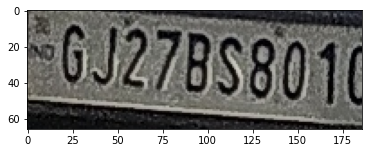

In [4]:
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image)

### Color Quanitization

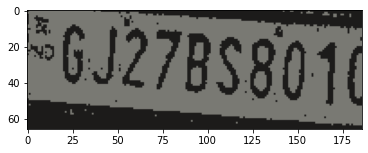

In [5]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)
criteria = (cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 2
retval,labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
final_metadata = centers[labels.flatten()]
final_image = final_metadata.reshape((image.shape))
plt.imshow(final_image)

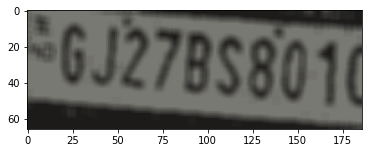

In [6]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(final_image, -1, kernel)
plt.imshow(dst)

In [7]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

### Trial 1

In [8]:
print(pytesseract.image_to_string(final_image))

“GJ27B5801



### Trial 2

In [9]:
print(pytesseract.image_to_string(dst))

“GJ27BS801(



### Image Sharpening

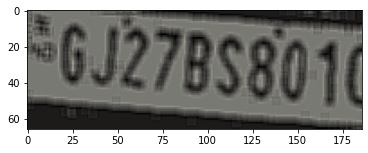

In [10]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharp_image = cv.filter2D(src = dst, ddepth = -1, kernel = kernel)
plt.imshow(sharp_image)

### Trial 3

In [11]:
print(pytesseract.image_to_string(sharp_image))